<img src="https://user-images.strikinglycdn.com/res/hrscywv4p/image/upload/c_limit,fl_lossy,h_300,w_300,f_auto,q_auto/1266110/Logo_wzxi0f.png" style="float: left; margin: 20px; height: 55px">

# Day 29 - Exercises Solutions

## 1)

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height?

Like the NSFG, the BRFSS oversamples some groups and provides a sampling weight for each respondent. In the BRFSS data, the variable name for these weights is totalwt. Use resampling, with and without weights, to estimate the mean height of respondents in the BRFSS, the standard error of the mean, and a 90% confidence interval. How much does correct weighting affect the estimates?

In [40]:
import brfss

df = brfss.ReadBrfss(nrows=None)
df = df.dropna(subset=['htm3', 'wtkg2'])
heights, weights = df.htm3, df.wtkg2
log_weights = np.log10(weights)

Estimate intercept and slope.

In [41]:
# Solution

inter, slope = thinkstats2.LeastSquares(heights, log_weights)
inter, slope

(0.99308041639176214, 0.0052814541694181042)

Make a scatter plot of the data and show the fitted line.

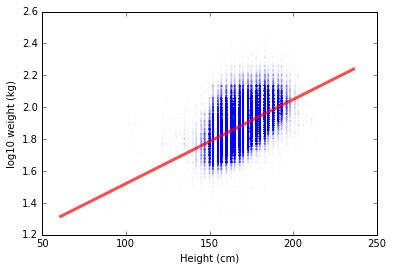

In [42]:
# Solution

thinkplot.Scatter(heights, log_weights, alpha=0.01, s=5)
fxs, fys = thinkstats2.FitLine(heights, inter, slope)
thinkplot.Plot(fxs, fys, color='red')
thinkplot.Config(xlabel='Height (cm)', ylabel='log10 weight (kg)', legend=False)

Make the same plot but apply the inverse transform to show weights on a linear (not log) scale.

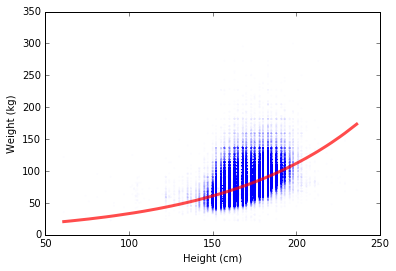

In [43]:
# Solution

thinkplot.Scatter(heights, weights, alpha=0.01, s=5)
fxs, fys = thinkstats2.FitLine(heights, inter, slope)
thinkplot.Plot(fxs, 10**fys, color='red')
thinkplot.Config(xlabel='Height (cm)', ylabel='Weight (kg)', legend=False)

Plot percentiles of the residuals.

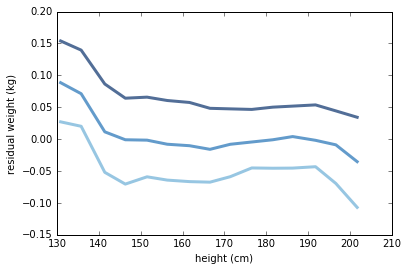

In [44]:
# Solution

# The lines are flat over most of the range, 
# indicating that the relationship is linear.

# The lines are mostly parallel, indicating 
# that the variance of the residuals is the 
# same over the range.

res = thinkstats2.Residuals(heights, log_weights, inter, slope)
df['residual'] = res

bins = np.arange(130, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

means = [group.htm3.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.residual) for i, group in groups][1:-1]

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    ys = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(means, ys, label=label)
    
thinkplot.Config(xlabel='height (cm)', ylabel='residual weight (kg)', legend=False)

Compute correlation.

In [45]:
# Solution

rho = thinkstats2.Corr(heights, log_weights)
rho

0.53172826059835865

Compute coefficient of determination.

In [46]:
# Solution

r2 = thinkstats2.CoefDetermination(log_weights, res)
r2

0.28273494311894465

Confirm that $R^2 = \rho^2$.

In [47]:
# Solution

rho**2 - r2

1.1379786002407855e-14

Compute Std(ys), which is the RMSE of predictions that don't use height.

In [48]:
# Solution

std_ys = thinkstats2.Std(log_weights)
std_ys

0.10320725030004985

Compute Std(res), the RMSE of predictions that do use height.

In [49]:
# Solution

std_res = thinkstats2.Std(res)
std_res

0.08740777080416137

How much does height information reduce RMSE?

In [50]:
# Solution

1 - std_res / std_ys

0.15308497658793685

Use resampling to compute sampling distributions for inter and slope.

In [51]:
# Solution

t = []
for _ in range(100):
    sample = thinkstats2.ResampleRows(df)
    estimates = thinkstats2.LeastSquares(sample.htm3, np.log10(sample.wtkg2))
    t.append(estimates)

inters, slopes = zip(*t)

Plot the sampling distribution of slope.

{'xscale': 'linear', 'yscale': 'linear'}

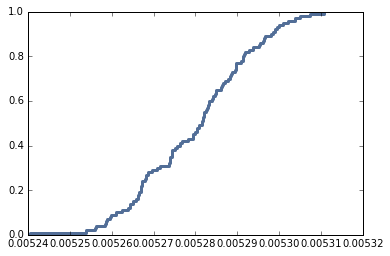

In [52]:
# Solution

cdf = thinkstats2.Cdf(slopes)
thinkplot.Cdf(cdf)

Compute the p-value of the slope.

In [53]:
# Solution

pvalue = cdf[0]
pvalue

0.0

Compute the 90% confidence interval of slope.

In [54]:
# Solution

ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(0.005258455600566282, 0.0053010372902926334)

Compute the mean of the sampling distribution.

In [55]:
# Solution

mean = thinkstats2.Mean(slopes)
mean

0.0052798575112807831

Compute the standard deviation of the sampling distribution, which is the standard error.

In [56]:
# Solution

stderr = thinkstats2.Std(slopes)
stderr

1.3729052821979253e-05

Resample rows without weights, compute mean height, and summarize results.

In [57]:
# Solution

estimates_unweighted = [thinkstats2.ResampleRows(df).htm3.mean() for _ in range(100)]
Summarize(estimates_unweighted)

mean, SE, CI 168.956281478 0.0181263933662 (168.92164099921177, 168.98275025768507)


Resample rows with weights.  Note that the weight column in this dataset is called `finalwt`.

In [58]:
# Solution

# The estimated mean height is almost 2 cm taller 
# if we take into account the sampling weights,
# and this difference is much bigger than the sampling error.

estimates_weighted = [ResampleRowsWeighted(df, 'finalwt').htm3.mean() for _ in range(100)]
Summarize(estimates_weighted)

mean, SE, CI 170.493482765 0.0175006466794 (170.46498514521312, 170.51920259099819)
